In [80]:
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
pd.set_option('display.max_columns', None)

In [81]:
# def mapeobj(preds,dtrain):
#     gaps = dtrain.get_label()
#     grad = np.sign(preds-gaps)/gaps
#     hess = 1/gaps
#     grad[(gaps==0)] = 0
#     hess[(gaps==0)] = 0
#     return grad,hess  

# def evalmape(preds, dtrain):
#     gaps = dtrain.get_label()
#     err = abs(gaps-preds)/gaps
#     err[(gaps==0)] = 0
#     err = np.mean(err)
#     return 'error',err 
def mape(t,p):
    sum = 0
    for i in range(t.shape[0]):
        sum += abs((t[i]-p[i])/t[i])
    return sum*100/t.shape[0]
def metric_rf(label_train, target_train, label_test, target_test, model, cri):
    print(model)
    fit_time = 0
    score_time = 0
    test_score = 0
    train_score = 0
    result = cross_validate(model, label_test, target_test, scoring=cri)
    for i in range(3):
        fit_time += result['fit_time'][i]
        score_time += result['score_time'][i]
        test_score += result['test_score'][i]
        train_score += result['train_score'][i]
    return [fit_time/3, score_time/3, test_score/3, train_score/3]

In [82]:
ts = pd.read_csv('features.csv')
temp = ts[['logerror']]
y = temp['logerror'].apply(lambda x: (math.exp(x)*10))
X = ts.drop('logerror', axis=1)
# Split data with 0.75
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)
print (X_train.shape[0]/(X_train.shape[0]+X_test.shape[0]))

(115563, 9)
(115563,)
(49528, 9)
(49528,)
0.6999957599142291


In [83]:
# Random Forest with MSE

# Multi-Linear Regression with MRE
frames = []
for i in range(5):
    for j in range(5):
        print("Round %d:" % (i*5+j+1))
        rf = RandomForestRegressor(n_estimators=5*(i+1), criterion='mse', max_depth=5*(j+1), random_state=10)
        rf.fit(X_train, y_train)
        metric = metric_rf(X_train, np.array(y_train), X_test, np.array(y_test), rf, 'neg_mean_squared_error')
        print(metric)
        result = pd.DataFrame.from_items([(i,metric)],\
                                         orient='index',\
                                         columns=['fit_time','score_time','test_score','train_score'])
        frames.append(result)
        print("****************************")
m = pd.concat(frames)
print(m)

Round 1:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)
[0.40418299039204914, 0.0083723068237304688, -0.38266852158461268, -0.37625768636985191]
****************************
Round 2:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)
[0.80558300018310547, 0.0070099830627441406, -0.38933056543242078, -0.34287013759653889]
********************

[2.5102334022521973, 0.024712244669596355, -0.38223147300212895, -0.33706641666486187]
****************************
Round 18:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)
[3.4914209842681885, 0.041444937388102211, -0.38828749933789264, -0.26096378316963692]
****************************
Round 19:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_sta

In [70]:
rf_best = RandomForestRegressor(n_estimators=5, criterion='mse', max_depth=5, random_state=10)
rf_best.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [74]:
pickle.dump(rf_best, open('random_forest.pkl','wb'))
my_rf = pickle.load(open('random_forest.pkl','rb'))
my_rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

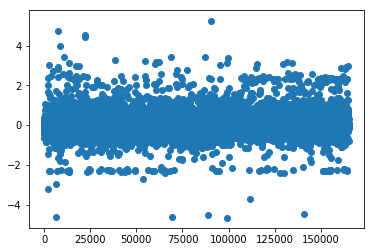

In [40]:
plt.figure("Log error scatter of 2016")
plt.scatter(range(temp.shape[0]), np.sort(temp.values))
plt.show()

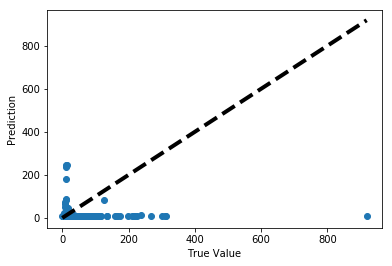

In [32]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('True Value')
ax.set_ylabel('Prediction')
plt.show()